In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [ ]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Fill missing values if any (this dataset has none, but we'll show how to handle it)
# For demonstration, use median for numeric columns (if there were missing values)
df_filled = df.fillna(df.median(numeric_only=True))

print(df.isnull().sum())



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Step 3: One-Hot Encode categorical variables
# We'll treat 'cp', 'thal', 'slope' and 'restecg' as categorical and apply one-hot encoding

df_encoded = pd.get_dummies(df_filled, columns=['cp', 'thal', 'slope', 'restecg'], drop_first=True)

# Show resulting dataframe structure
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,False,False,False,False,False,True,False,True,True,False
1,53,1,140,203,1,155,1,3.1,0,0,False,False,False,False,False,True,False,False,False,False
2,70,1,145,174,0,125,1,2.6,0,0,False,False,False,False,False,True,False,False,True,False
3,61,1,148,203,0,161,0,0.0,1,0,False,False,False,False,False,True,False,True,True,False
4,62,0,138,294,1,106,0,1.9,3,0,False,False,False,False,True,False,True,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 4: Feature Scaling
# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling later
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show a preview of the scaled features
X_scaled_df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,-0.268437,0.661504,-0.377636,-0.659332,-0.418878,0.821321,-0.712287,-0.060888,1.209221,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,1.088807,0.999025,-0.121867
1,-0.158157,0.661504,0.479107,-0.833861,2.387330,0.255968,1.403928,1.727137,-0.731971,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,-0.918436,-1.000976,-0.121867
2,1.716595,0.661504,0.764688,-1.396233,-0.418878,-1.048692,1.403928,1.301417,-0.731971,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,-0.918436,0.999025,-0.121867
3,0.724079,0.661504,0.936037,-0.833861,-0.418878,0.516900,-0.712287,-0.912329,0.238625,-0.441179,-0.619085,-0.284998,-0.258065,-1.063474,1.224745,-0.942158,1.088807,0.999025,-0.121867
4,0.834359,-1.511706,0.364875,0.930822,2.387330,-1.874977,-0.712287,0.705408,2.179817,-0.441179,-0.619085,-0.284998,-0.258065,0.940314,-0.816497,1.061393,-0.918436,0.999025,-0.121867


In [ ]:
from sklearn.model_selection import train_test_split

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# Show the size of each split
split_sizes = {
    "X_train shape": X_train.shape,
    "X_test shape": X_test.shape,
    "y_train shape": y_train.shape,
    "y_test shape": y_test.shape
}

split_sizes


{'X_train shape': (820, 19),
 'X_test shape': (205, 19),
 'y_train shape': (820,),
 'y_test shape': (205,)}

XGBoost

In [ ]:
# Step 0: 安装 xgboost（如果尚未安装）
# !pip install xgboost

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("heart.csv")
df.fillna(df.median(numeric_only=True), inplace=True)

df_encoded = pd.get_dummies(df, columns=["cp", "thal", "slope", "restecg"], drop_first=True)

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Before Tuning
xgb_weak = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=2,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_weak.fit(X_train, y_train)
y_pred_weak = xgb_weak.predict(X_test)

print("🔹 BEFORE TUNING")
print("Accuracy:", accuracy_score(y_test, y_pred_weak))
print("F1 Score:", f1_score(y_test, y_pred_weak))

# Step 6: After Tuning（GridSearchCV）
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
xgb_best = grid_search.best_estimator_
y_pred_best = xgb_best.predict(X_test)

print("\n🔹 AFTER TUNING (grid search)")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 BEFORE TUNING
Accuracy: 0.8048780487804879
F1 Score: 0.8095238095238095

🔹 AFTER TUNING (grid search)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 1.0
F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


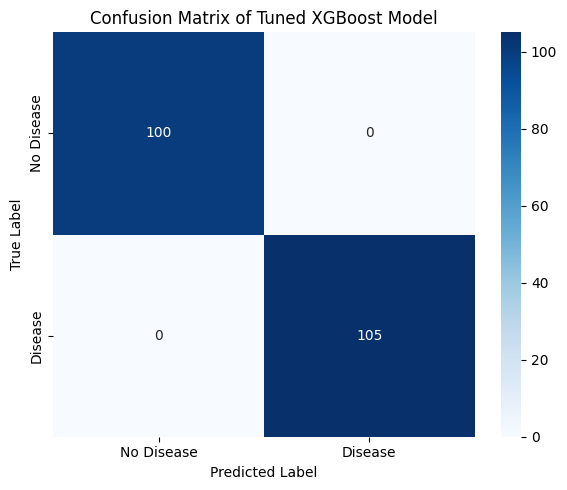

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
labels = ['No Disease', 'Disease']

# Visualization using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of Tuned XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
